In [1]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import bqplot as bqplot
import ipywidgets as widgets
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import Layout, VBox, HBox, Label, Checkbox, widgets,HTML,interact
from IPython.display import display, clear_output
import os
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import folium

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nithi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading the dataset 

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.shape

(7946092, 22)

In [8]:
df['Arrest'].unique()

array([False,  True])

## Preprocessing the dataset

In [9]:
# Dropping the rows with are having Null values
missing_values = [None, '', 'NA', 'NaN', 'N/A', 'None', 'missing', np.nan, pd.NaT]

# Replace the defined missing values with NaN in the entire DataFrame
new_df.replace(missing_values, np.nan, inplace=True)
new_df.dropna(inplace=True)


In [11]:
new_df.to_csv('tab_data.csv', index=False)

# Viz - 1 : Crime Distribution over Years by Crime Type


### *Visualization Process:*
  - Set the Seaborn style to "whitegrid" for a clean background.
  - Define a function `update_plot` to dynamically update the plot based on the selected crime type.
  - Inside the function, group the data by year and crime type, creating a line plot with markers using Matplotlib.
  - Utilize a dropdown widget with crime types, including an "All" option.
  - Use the `interact` function to create an interactive widget that triggers the plot update when the crime type is selected.

- *Challenges Encountered:*
  - *Data Grouping:* Addressed the challenge of grouping data by year and crime type, particularly handling the case when "All" crime types are selected.
  - *Widget Integration:* Ensured smooth integration of the dropdown widget (`crime_type_dropdown`) with the interactive plotting function.
  - *Legend Placement:* Adjusted legend placement to avoid overlapping with the plot, ensuring clarity in visual representation.
  - *Plot Aesthetics:* Worked on enhancing plot aesthetics, including title, labels, color map, and marker style for better interpretability.

- *Improvements:*
  - Additional features like tooltips for enhanced interactivity.
  - Exploring further customization options for the Seaborn style and Matplotlib parameters.
  - Ensuring robust error handling for unexpected inputs or data issues.

In [10]:


# Set seaborn style
sns.set(style="whitegrid")

# Assuming df is already loaded with the data

# Create a function to update the plot based on the selected crime type
def update_plot(selected_type):
    plt.figure(figsize=(12, 6))

    if selected_type == 'All':
        crime_by_type_year = df.groupby(['Year', 'Primary Type'])['ID'].count().unstack()
    else:
        crime_by_type_year = df[df['Primary Type'] == selected_type].groupby(['Year', 'Primary Type'])['ID'].count().unstack()

    crime_by_type_year.plot(kind='line', marker='o', figsize=(12, 6), colormap='tab20', lw=2)
    plt.title(f'Crime Distribution Over Years - {selected_type}')
    plt.xlabel('Year')
    plt.ylabel('Number of Crimes')
    plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Create a dropdown widget for crime types
crime_types = ['All'] + list(df['Primary Type'].unique())
crime_type_dropdown = widgets.Dropdown(options=crime_types, value='All', description='Crime Type:')

# Use interact to create an interactive widget
interact(update_plot, selected_type=crime_type_dropdown)


interactive(children=(Dropdown(description='Crime Type:', options=('All', 'ASSAULT', 'HOMICIDE', 'BURGLARY', '…

<function __main__.update_plot(selected_type)>

## *Word Cloud Visualization Process:*
  - Imported the necessary libraries, including `nltk` for stopwords and `WordCloud` for generating word clouds.
  - Compiled a string (`descriptions`) containing all non-null crime descriptions from the DataFrame.
  - Created a `WordCloud` object with specified parameters such as stopwords, background color, width, and height.
  - Used Matplotlib to display the word cloud with interpolation set to 'bilinear' for smoother visualization.
  - Adjusted the figure size, added a title ('Word Cloud for Crime Descriptions'), and turned off axis labels for a cleaner presentation.

- *Challenges Encountered:*
  - *Stopwords Handling:* Managed the incorporation of English stopwords to filter out common and less informative words.
  - *Figure Size and Aesthetics:* Tuned the figure size to ensure an appropriate aspect ratio for readability and visual appeal.
  - *Interpolation Technique:* Experimented with different interpolation techniques to find the optimal setting for a clear and visually pleasing word cloud.

- *Improvements:*
  - Explore additional customization options for the WordCloud object, such as color schemes and font styles.
  - Consider creating a function for reusability with different datasets or variations in word cloud generation.
  - Provide an option for user-defined stopwords or fine-tuning stopwords based on specific contexts.

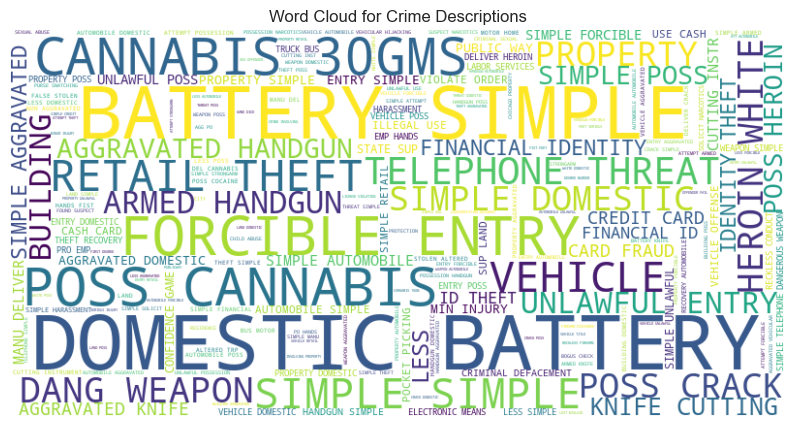

In [11]:
stop_words = set(stopwords.words('english'))
descriptions = ' '.join(df['Description'].dropna())
wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(descriptions)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Crime Descriptions')
plt.axis('off')
plt.show()

# Viz - 2 : Number of Crimes by Year for Selected Location and Arrest Status

In [6]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [18]:
# To group Year, Location.Description, and Arrest columns and count the the number of occurrences for each 
#unique combination of all these columns.

grouped_df = df.groupby(['Year', 'Location Description', 'Arrest']).size().reset_index(name='Counts')

# To Create x and y scales
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.LinearScale()

# To Create axes
x_ax = bqplot.Axis(scale=x_sc, label='Year')
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical', label='Number of Crimes', tick_format='.0f', label_offset = '50px')

# To Create a basic tooltip using BQplot tooltip function
tooltip = bqplot.Tooltip(fields=['x', 'y'], labels=['Year', 'Number of Crimes'])

# To Create a bar chart
bars = bqplot.Bars(x=[], y=[], scales={'x': x_sc, 'y': y_sc}, tooltip=tooltip, display_legend=False)

# To Create a text box for displaying the total crime count
total_crime_text = widgets.Text(value='', description='Total Crimes:', disabled=True)

# To Create dropdowns for location and arrest selection
location_dropdown = widgets.Dropdown(options=grouped_df['Location Description'].unique(), description='Select Loc:')
arrest_dropdown = widgets.Dropdown(options=['All', True, False], description='Arrest Made:')

# Function to update the bar chart and total crime count based on selected filters
def update_chart(*args):
    selected_location = location_dropdown.value
    arrest_made = arrest_dropdown.value
    if arrest_made == 'All':
        filtered_df = grouped_df[grouped_df['Location Description'] == selected_location]
    else:
        filtered_df = grouped_df[(grouped_df['Location Description'] == selected_location) & (grouped_df['Arrest'] == arrest_made)]
    bars.x = filtered_df['Year']
    bars.y = filtered_df['Counts']
    total_crimes = filtered_df['Counts'].sum()
    total_crime_text.value = str(total_crimes)

# Observe changes in the dropdowns
location_dropdown.observe(update_chart, names='value')
arrest_dropdown.observe(update_chart, names='value')

# To Create a figure
fig = bqplot.Figure(marks=[bars], axes=[x_ax, y_ax], title='Number of Crimes by Year for Selected Location and Arrest Status')

# To Display the dropdowns, total crimes text widget, and the figure
display(widgets.VBox([location_dropdown, arrest_dropdown, total_crime_text, fig]))

# Function to load or reload the data
def load_data(_):
    global df 
    df = pd.read_csv('Crimes_-_2001_to_Present.csv')  
    print("Data reloaded!") 

# Create a button widget
reload_button = widgets.Button(description="Reload Data")

# Attach the load_data function to the button's on_click event
reload_button.on_click(load_data)

# Display the button
display(reload_button)

Button(description='Reload Data', style=ButtonStyle())


### *Visualization Process:*
  - Started off with just a simple Bar chart showing Year and number of crimes after grouping the data.   
  - Tried to integrate the tooltip function from bqplot keeping the two axes in display.
  - Used the drop down widget from ipywidgets module to have Location selection.
  - Used the drop down widget from ipywidgets module to have Arrest selection.
  - At the end, visualized a textbox to display the total counts even considering the arrests.

### *Challenges Encountered:*
  - *Widget Integration:* Making sure the the 3 widgets work parallelly and integrating them in the code took some time.
  - *Y-label Placement:* Adjusted y-label placement to avoid overlapping with the number of crimes, ensuring clarity in visual representation.
  - *Without grouping the columns, the visualizations looked a bit weird considering the number of labels on the y-axis which were overlapped on one other. Then I got an idea of implementing the dropdown to restrict every location to be displayed*
  - *Data loading time(more than 7 million rows!!)*
  

# Process followed

## Step - 1 

In [19]:
# Group by 'Year' and 'Location.Description'
grouped_df = df.groupby(['Year', 'Location Description']).size().reset_index(name='Counts')

# Create x and y scales
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.LinearScale()

# Create axes
x_ax = bqplot.Axis(scale=x_sc, label='Year')
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical', label='Number of Crimes', tick_format='.0f')

# Create a bar chart
bars = bqplot.Bars(x=grouped_df['Year'], y=grouped_df['Counts'], scales={'x': x_sc, 'y': y_sc}, display_legend=False)

# Create a figure
fig = bqplot.Figure(marks=[bars], axes=[x_ax, y_ax], title='Number of Crimes by Year')

# Display the figure
display(fig)


Figure(axes=[Axis(label='Year', scale=OrdinalScale()), Axis(label='Number of Crimes', orientation='vertical', …

## Step - 2 

In [20]:
grouped_df = df.groupby(['Year', 'Location Description']).size().reset_index(name='Counts')
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.LinearScale()
x_ax = bqplot.Axis(scale=x_sc, label='Year')
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical', label='Number of Crimes', tick_format='.0f')
tooltip = bqplot.Tooltip(fields=['x', 'y'], labels=['Year', 'Number of Crimes'])
bars = bqplot.Bars(x=grouped_df['Year'], y=grouped_df['Counts'], scales={'x': x_sc, 'y': y_sc}, 
                   tooltip=tooltip, display_legend=False)
fig = bqplot.Figure(marks=[bars], axes=[x_ax, y_ax], title='Number of Crimes by Year')
display(fig)


Figure(axes=[Axis(label='Year', scale=OrdinalScale()), Axis(label='Number of Crimes', orientation='vertical', …

## Step - 3 

In [21]:
# Group by 'Year' and 'Location.Description'
grouped_df = df.groupby(['Year', 'Location Description']).size().reset_index(name='Counts')

# Create x and y scales
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.LinearScale()

# Create axes
x_ax = bqplot.Axis(scale=x_sc, label='Year')
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical', label='Number of Crimes', tick_format='.0f')

# Create a basic tooltip
tooltip = bqplot.Tooltip(fields=['x', 'y'], labels=['Year', 'Number of Crimes'])

# Create a bar chart (initially empty)
bars = bqplot.Bars(x=[], y=[], scales={'x': x_sc, 'y': y_sc}, 
                   tooltip=tooltip, display_legend=False)

# Create a text widget for displaying the total crime count
total_crime_text = widgets.Text(value='', description='Total Crimes:', disabled=True)

# Function to update the bar chart and total crime count based on selected location
def on_location_change(change):
    if change['new']:
        selected_location = change['new']
        filtered_df = grouped_df[grouped_df['Location Description'] == selected_location]
        bars.x = filtered_df['Year']
        bars.y = filtered_df['Counts']
        total_crimes = filtered_df['Counts'].sum()
        total_crime_text.value = str(total_crimes)

# Create a dropdown for location selection
location_dropdown = widgets.Dropdown(options=grouped_df['Location Description'].unique(), description='Select Location:')
location_dropdown.observe(on_location_change, names='value')


# Create a figure
fig = bqplot.Figure(marks=[bars], axes=[x_ax, y_ax], title='Number of Crimes by Year for Selected Location')





# Display the dropdown, total crimes text widget, and the figure
display(widgets.VBox([location_dropdown, total_crime_text, fig]))

## Refresh Button

In [16]:
df = df.sample(n=5000, random_state=42) 

### Using a function to retrieve data from a local file and utilizing an ipywidget button to update the dataset.

# Viz - 3 : Arrest Rates by Crime Type


### *Challenges Encountered:*
  - the color bar is divided into intervals based on the number of unique crime types
  - It uses `np.linspace` to generate evenly spaced values between 0 and 1, but for now, the colors of crime types which have the same arrest rate still have slightly diffrent
  - The information not very clear to the views for now, may not clearly knoow the arrest rate for each crime type. (To solve this, maybe need to use plotly?)


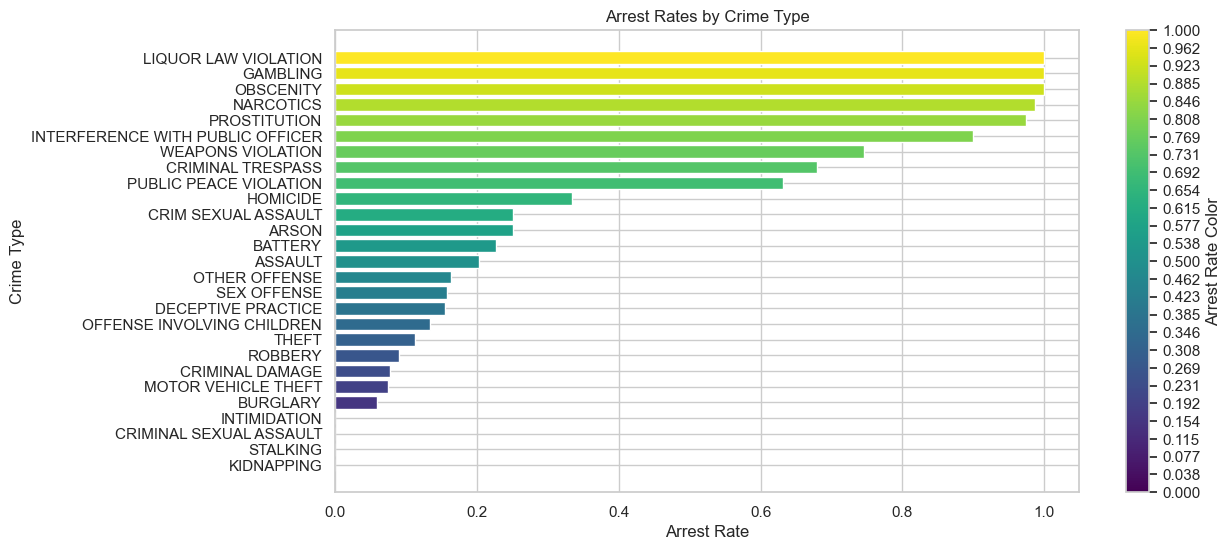

In [22]:
# Group by crime type and calculate the arrest rate
arrest_rates = df.groupby('Primary Type')['Arrest'].mean()

# Generate a colormap with a color for each bar
colormap = plt.cm.viridis(np.linspace(0, 1, len(arrest_rates)))

# Plotting with plt.bar
plt.figure(figsize=(12, 6))
bars = plt.barh(arrest_rates.sort_values().index, arrest_rates.sort_values(), color=colormap)
plt.title('Arrest Rates by Crime Type')
plt.xlabel('Arrest Rate')
plt.ylabel('Crime Type')

# Add a color legend
color_legend = plt.cm.ScalarMappable(cmap=plt.cm.viridis)
color_legend.set_array([])
cbar = plt.colorbar(color_legend, ticks=np.linspace(0, 1, len(arrest_rates)))
cbar.set_label('Arrest Rate Color')

plt.show()

# Viz - 4: Mapping Crime Locations on various crime type

### *Challenges Encountered:*
  - Creating a map visualization using Matplotlib or bqplot requires transforming latitude and longitude into Cartesian coordinates, which can be challenging. Additionally, these libraries are not ideal for geospatial visualization. While you can create a scatter plot using the provided coordinates in the data, it did not accurately represent the Chicago area, and the Albers USA map projection resulted in a distorted visualization.

In [24]:
data_df = df.sample(n=5000)
data_df = data_df.dropna(subset=['Latitude','Longitude','Block'])

dropdown_val = list(data_df['Primary Type'].unique())
dropdown_val.append('ALL')
dropdown_map = widgets.Dropdown(options=dropdown_val,value = 'ALL',description='Crime:',disabled=False)

def display_df(change_val):
    clear_output(wait=True)
    display(dropdown_map)
    filtered_df = data_df
    temp=change_val['new']
    if temp != 'ALL': 
        filtered_df = data_df[data_df['Primary Type'] == temp]
    if filtered_df.shape[0]<101:
        display_map(filtered_df)
    else:
        display_map(filtered_df.head(100))
        
def display_map(df):
    chicago_coordinates = [41.8781, -87.6298]
    places ={k: g[['Latitude', 'Longitude','ID']].values.tolist() for k, g in df.groupby('Block')}
    chicago_map = folium.Map(location=chicago_coordinates, zoom_start=12, width=800, height=800)
    for place, coord in places.items():
        if np.isnan(coord).any():
            continue
        else:
            cod = coord[0][0],coord[0][1]
            cod = list(cod)
            uid = coord[0][2]
            folium.Marker(location=cod, popup=folium.Popup(popup_msg(uid),max_width=300)).add_to(chicago_map)
    display(chicago_map)
    
def popup_msg(uid):
    req_row = data_df[data_df['ID']==uid]
    popup = f"""
        <h4>Crime Details:</h4>
        <p><strong>Place:</strong> {req_row['Block'].values[0]} </p>
        <p><strong>Discription:</strong> {req_row['Description'].values[0]}</p>
        <p><strong>Location:</strong> {req_row['Location Description'].values[0]}</p>
        <p><strong>Arrest:</strong> {req_row['Arrest'].values[0]}</p>
        <p><strong>Date:</strong> {req_row['Date'].values[0]}</p>
        """
    return popup

dropdown_map.observe(display_df, names='value')
display(dropdown_map)

Dropdown(description='Crime:', index=14, options=('THEFT', 'ASSAULT', 'CRIMINAL DAMAGE', 'NARCOTICS', 'MOTOR V…